In [72]:
import os, sys, glob
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import pickle

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model 5

In [231]:
grid_path = 'G:\Il mio Drive\Colab Notebooks\LANL\grids\grid_05.pkl'

In [232]:
with open(grid_path, 'rb') as f:
    df = pickle.load(f)

In [222]:
df['val_score_mean'] = df.fit_outs.apply(lambda x: calculate_score(x, 'val_loss', np.mean, 10))
df['val_score_std'] = df.fit_outs.apply(lambda x: calculate_score(x, 'val_loss', np.std, 10))

df['train_score_mean'] = df.fit_outs.apply(lambda x: calculate_score(x, 'loss', np.mean, 10))
df['train_score_std'] = df.fit_outs.apply(lambda x: calculate_score(x, 'loss', np.std, 10))

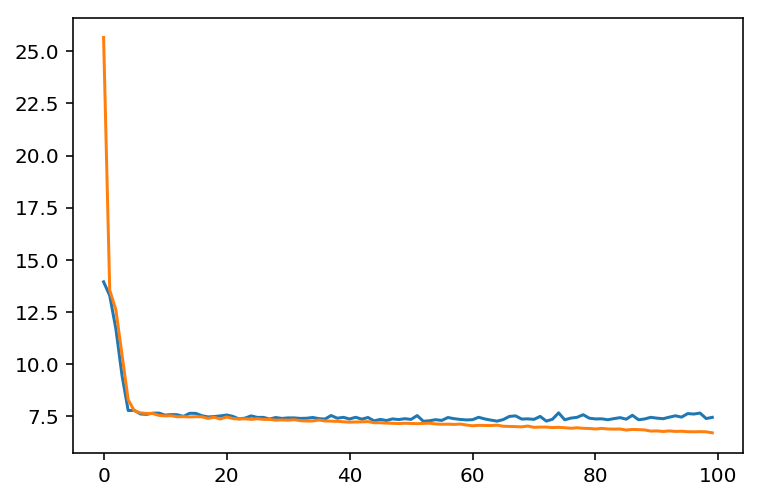

In [229]:
full_hist = [fit_out.history['val_loss'] for fit_out in df.fit_outs[0]]
full_hist_mean = list(np.mean(full_hist, 0))
plt.plot(full_hist_mean)
full_hist = [fit_out.history['loss'] for fit_out in df.fit_outs[0]]
full_hist_mean = list(np.mean(full_hist, 0))
plt.plot(full_hist_mean)

In [261]:
from keras.models import load_model
model = load_model('G:\Il mio Drive\Colab Notebooks\LANL\models\05\best_model_2.0_1.pkl')

OSError: Unable to open file (unable to open file: name = 'G:\Il mio Drive\Colab Notebooks\LANL\modelsest_model_2.0_1.pkl', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## Model 4

In [233]:
grid_path = 'G:\Il mio Drive\Colab Notebooks\LANL\grids\grid_04.pkl'

In [235]:
def calculate_score(fit_outs, metric='loss', agg=np.mean, sample_counts=10):
    full_hist = [fit_out.history[metric] for fit_out in fit_outs]
    full_hist_mean = sorted(list(np.mean(full_hist, 0)))
    scores = np.array(full_hist_mean)[:sample_counts]
    return agg(scores)


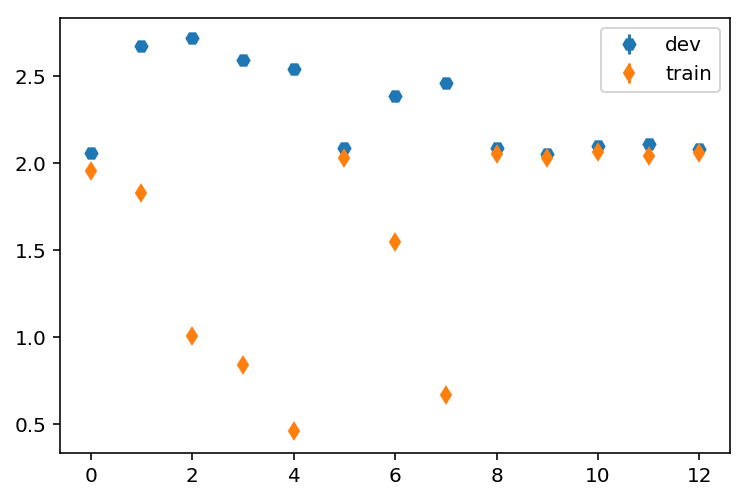

In [243]:
with open(grid_path, 'rb') as f:
    df = pickle.load(f)
    

df['val_score_mean'] = df.fit_outs.apply(lambda x: calculate_score(x, 'val_loss', np.mean, 10))
df['val_score_std'] = df.fit_outs.apply(lambda x: calculate_score(x, 'val_loss', np.std, 10))

df['train_score_mean'] = df.fit_outs.apply(lambda x: calculate_score(x, 'loss', np.mean, 10))
df['train_score_std'] = df.fit_outs.apply(lambda x: calculate_score(x, 'loss', np.std, 10))

df_sq = df[df.loss == 'mean_squared_error']
df = df[df.loss == 'mean_absolute_error']

test_model_index = np.arange(df.shape[0])
plt.errorbar(test_model_index, df.val_score_mean, df.val_score_std, fmt='H', label='dev')
plt.errorbar(test_model_index, df.train_score_mean, df.train_score_std, fmt='d', label='train')
plt.legend()

In [251]:
for d in [df, df_sq]:
    print(d.groupby('conv_layers_count').mean().val_score_mean.to_frame())

                   val_score_mean
conv_layers_count                
2.0                      2.313337
3.0                      2.297863
                   val_score_mean
conv_layers_count                
2.0                     19.682862
3.0                      8.507873


In [245]:
for d in [df, df_sq]:
    print(d.groupby('avg_pool').mean().val_score_mean.to_frame())

          val_score_mean
avg_pool                
0.0             2.259727
1.0             2.406878
          val_score_mean
avg_pool                
0.0            16.403809
1.0            12.029579


In [246]:
for d in [df, df_sq]:
    print(d.groupby('avg_pool_size').mean().val_score_mean.to_frame())

               val_score_mean
avg_pool_size                
2.0                  2.259727
3.0                  2.244460
5.0                  2.569296
               val_score_mean
avg_pool_size                
2.0                 17.317820
3.0                 11.022888
6.0                 11.285404
7.0                  7.865537


In [247]:
for d in [df, df_sq]:
    print(d.groupby('gru').mean().val_score_mean.to_frame())

     val_score_mean
gru                
0.0        2.564073
1.0        2.082946
     val_score_mean
gru                
0.0       26.595195
1.0        8.224306


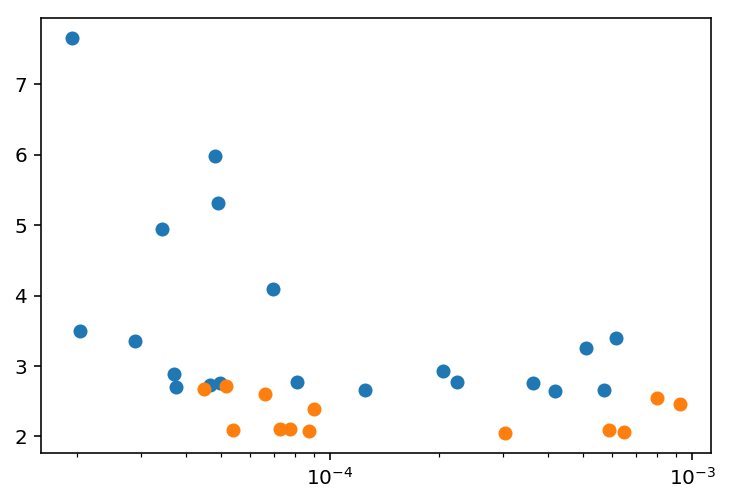

In [248]:
df_filt = df_sq

plt.errorbar(df_filt.learning_rate, np.sqrt(df_filt.val_score_mean), df_filt.val_score_std/50, fmt='o')
plt.xscale('log')

plt.errorbar(df.learning_rate, df.val_score_mean, df.val_score_std, fmt='o')
plt.xscale('log')

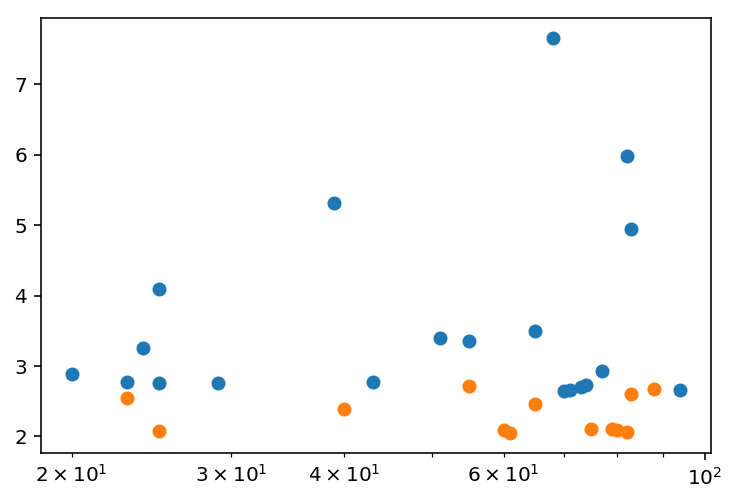

In [249]:
df_filt = df_sq

plt.errorbar(df_filt.dense_size, np.sqrt(df_filt.val_score_mean), df_filt.val_score_std/50, fmt='o')
plt.xscale('log')

plt.errorbar(df.dense_size, df.val_score_mean, df.val_score_std, fmt='o')
plt.xscale('log')

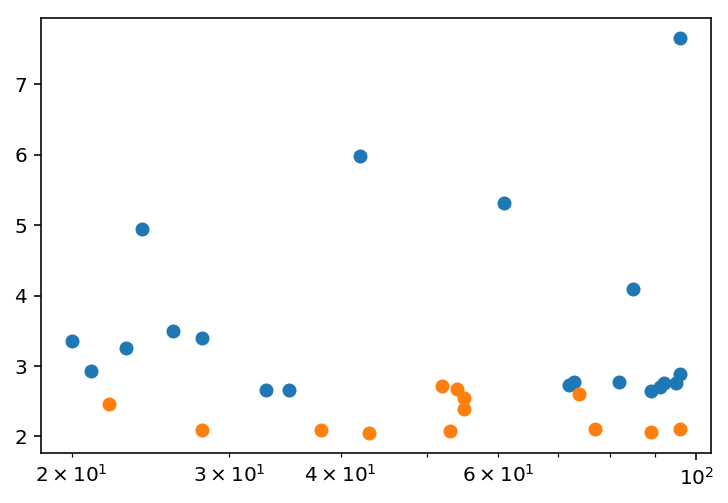

In [250]:
df_filt = df_sq

plt.errorbar(df_filt.gru_size, np.sqrt(df_filt.val_score_mean), df_filt.val_score_std/50, fmt='o')
plt.xscale('log')

plt.errorbar(df.gru_size, df.val_score_mean, df.val_score_std, fmt='o')
plt.xscale('log')

In [5]:
df.shape

(25, 27)

In [6]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('df', 30887),
 ('test_model_loss_mean', 304),
 ('test_model_loss_std', 304),
 ('grid_path', 213),
 ('test_model_index', 196),
 ('f', 176),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('sp', 80)]